This is a baseline notebook that was used to obtain the feature importance used in my solution.

Enjoy! 😉

In [1]:
import numpy as np # Numpy for numerical operations
import pandas as pd #Pandas for tabular operations
from catboost import CatBoostRegressor #Catboost for Modelling


import seaborn as sns # Seaborn for Plots
import matplotlib.pyplot as plt #Matplotlib for plots and visualizations
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

In [2]:
train = pd.read_csv("/kaggle/input/bitgrit-crypto/train.csv")
test = pd.read_csv("/kaggle/input/bitgrit-crypto/test.csv")
ss = pd.read_csv("/kaggle/input/bitgrit-crypto/solution_format.csv")

In [3]:
target = train.Target

In [4]:
train.tail()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
2655,2656,NaN,NaN,NaN,1.0,0.026,0.0,0.0,0.0,0.005,...,0.0,1.0,1,0.034,0.701073,-0.009556,NaN,NaN,NaN,0
2656,2657,NaN,NaN,NaN,1.0,0.009,0.0,1.0,0.0,0.006,...,0.0,0.0,1,0.114,0.283565,1.861150,NaN,NaN,NaN,1
2657,2658,NaN,NaN,NaN,0.0,0.016,0.0,1.0,1.0,0.004,...,1.0,2.0,0,0.035,-0.817023,-0.410857,NaN,NaN,NaN,0
2658,2659,NaN,NaN,NaN,1.0,0.072,0.0,0.0,0.0,0.018,...,0.0,0.0,1,0.022,1.312880,-0.923908,NaN,NaN,NaN,1
2659,2660,NaN,NaN,NaN,1.0,0.031,0.0,1.0,1.0,0.008,...,0.0,1.0,1,0.045,2.084196,0.533945,1.0,0.0,20.0,0


In [5]:
test.tail()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
661,3322,NaN,NaN,NaN,0.0,0.025,0.0,0.0,0.0,0.009,...,NaN,0.0,0.0,0,0.041,0.260899,-0.494080,NaN,NaN,NaN
662,3323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.077,1.660683,-0.067781,NaN,NaN,NaN
663,3324,NaN,NaN,NaN,0.0,0.019,0.0,0.0,0.0,0.009,...,4.569500,0.0,0.0,0,0.026,1.084864,0.078614,NaN,NaN,NaN
664,3325,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,1,0.020,0.280929,-1.747897,NaN,NaN,NaN
665,3326,NaN,NaN,NaN,1.0,0.020,0.0,0.0,0.0,0.005,...,2.767643,0.0,0.0,0,0.007,-0.511399,-0.818952,NaN,NaN,NaN


In [6]:
df = pd.concat([train.drop(["Target", "ID"], axis=1), test.drop("ID", axis=1)])
df.tail()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
661,NaN,NaN,NaN,0.0,0.025,0.0,0.0,0.0,0.009,1.233976,...,NaN,0.0,0.0,0,0.041,0.260899,-0.494080,NaN,NaN,NaN
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.077,1.660683,-0.067781,NaN,NaN,NaN
663,NaN,NaN,NaN,0.0,0.019,0.0,0.0,0.0,0.009,0.329421,...,4.569500,0.0,0.0,0,0.026,1.084864,0.078614,NaN,NaN,NaN
664,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.020,0.280929,-1.747897,NaN,NaN,NaN
665,NaN,NaN,NaN,1.0,0.020,0.0,0.0,0.0,0.005,-0.758024,...,2.767643,0.0,0.0,0,0.007,-0.511399,-0.818952,NaN,NaN,NaN


In [7]:
df.isnull().sum()

TR_1_EventInd    3240
TR_2_EventInd    3254
TR_3_EventInd    3198
feature_10_A      558
feature_10_B     1037
                 ... 
feature_X_C         0
feature_X_D         0
index_1          3217
index_2          3217
index_3          3217
Length: 76, dtype: int64

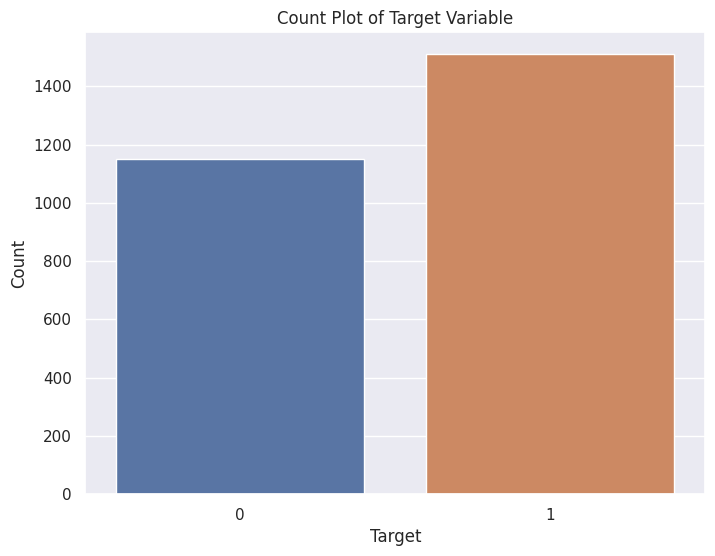

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the name of your DataFrame and 'target' is the name of your target variable
sns.set(style="darkgrid")  # Setting the style for the plot
plt.figure(figsize=(8, 6))  # Setting the size of the plot

# Creating the count plot
sns.countplot(data=train, x='Target')

# Adding labels and title
plt.title('Count Plot of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()  # Display the plot


In [10]:
df.describe()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
count,86.0,72.0,128.0,2768.000000,2289.000000,2768.0,2768.000000,2291.000000,2291.000000,2286.000000,...,2159.000000,2290.000000,2290.000000,3326.000000,3326.000000,3326.000000,3326.000000,109.000000,109.000000,109.000000
mean,1.0,1.0,1.0,0.392341,0.028023,0.0,0.458092,0.486251,0.008274,0.087925,...,3.983680,0.380349,0.894323,0.531870,0.044206,0.216083,0.041461,1.064220,7.422018,16.743119
std,0.0,0.0,0.0,0.488360,0.024544,0.0,0.791886,0.499920,0.004709,1.251985,...,1.467964,0.485579,1.361716,0.499058,0.037152,1.257359,1.062054,1.594407,16.947792,18.459367
min,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002000,-3.217639,...,1.842286,0.000000,0.000000,0.000000,0.003000,-3.360669,-2.381170,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,0.000000,0.015000,0.0,0.000000,0.000000,0.005000,-0.941272,...,2.500786,0.000000,0.000000,0.000000,0.019000,-0.782940,-0.730676,0.000000,0.000000,6.000000
50%,1.0,1.0,1.0,0.000000,0.022000,0.0,0.000000,0.000000,0.007000,0.124459,...,3.876714,0.000000,0.000000,1.000000,0.034000,0.265084,-0.123095,0.000000,0.000000,13.000000
75%,1.0,1.0,1.0,1.000000,0.033000,0.0,1.000000,1.000000,0.010000,1.101055,...,5.152536,1.000000,1.000000,1.000000,0.056000,1.244555,0.674408,2.000000,7.000000,20.000000
max,1.0,1.0,1.0,1.000000,0.419000,0.0,4.000000,1.000000,0.054000,2.955631,...,7.257000,1.000000,12.000000,1.000000,0.388000,3.378024,3.405693,7.000000,100.000000,100.000000


In [11]:
# Separate train and test data from the combined dataframe
df_train = df[:train.shape[0]]
df_test = df[train.shape[0]:]

X = df_train
y = target

# Check the shapes of the split dataset
df_train.shape, df_test.shape

((2660, 76), (666, 76))

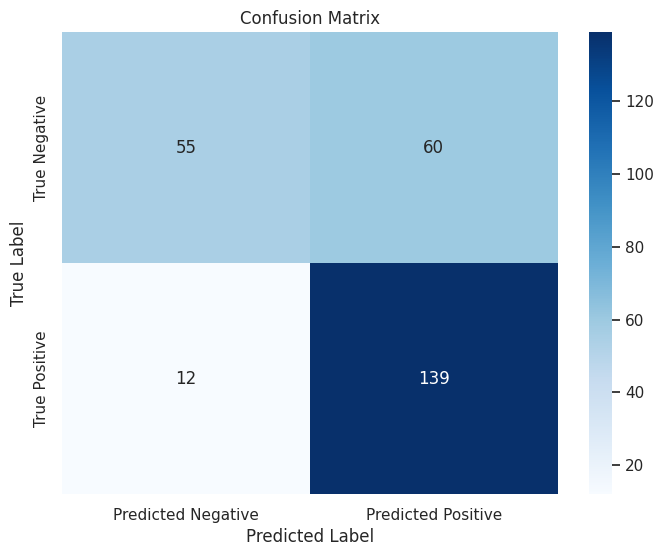

F1:  0.7942857142857143


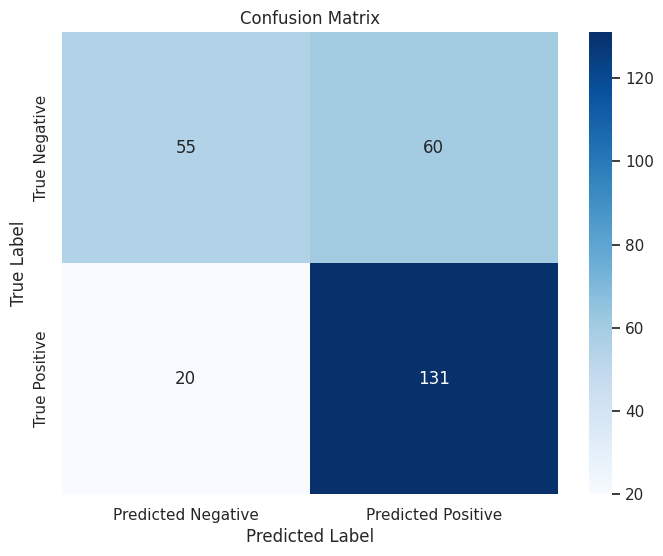

F1:  0.7660818713450291


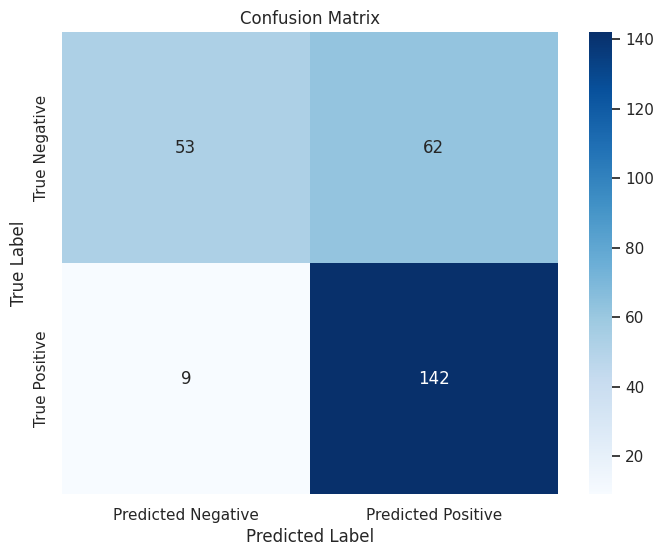

F1:  0.7999999999999999


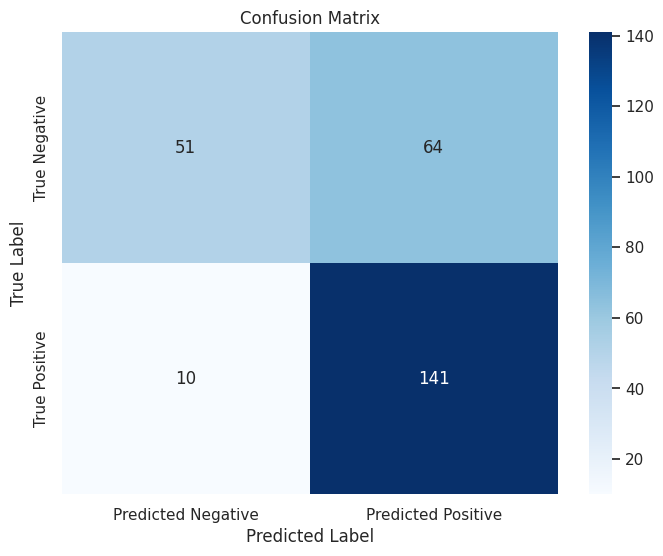

F1:  0.7921348314606742


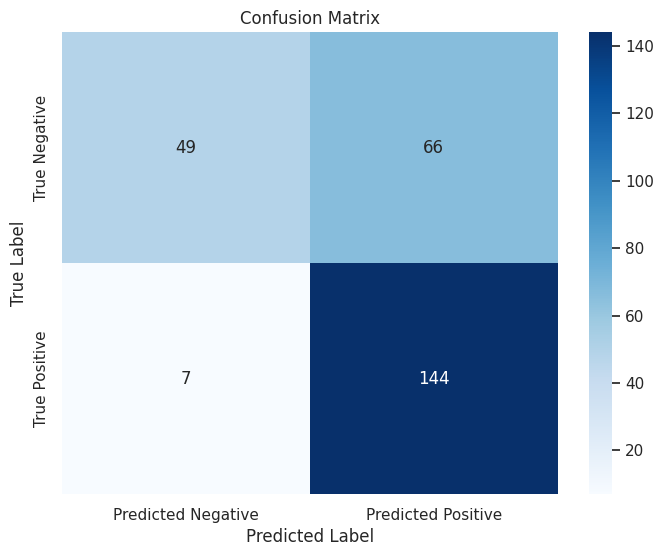

F1:  0.7977839335180056


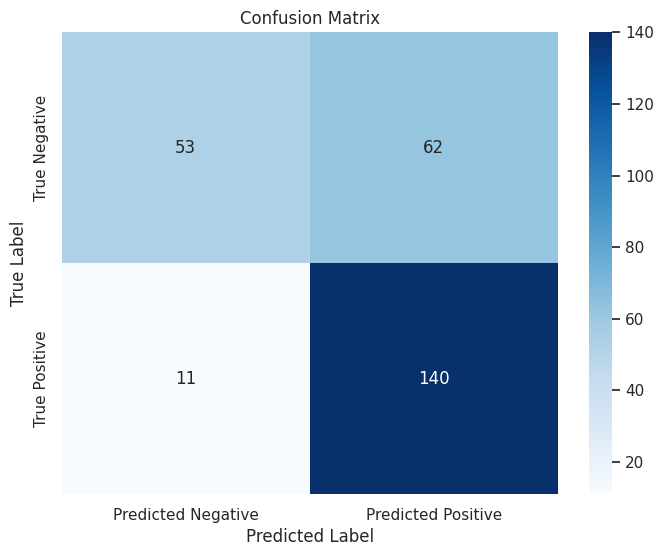

F1:  0.7932011331444759


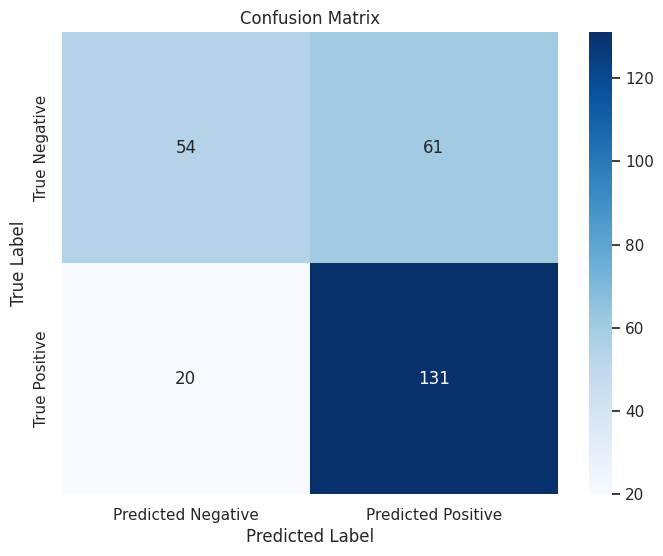

F1:  0.7638483965014577


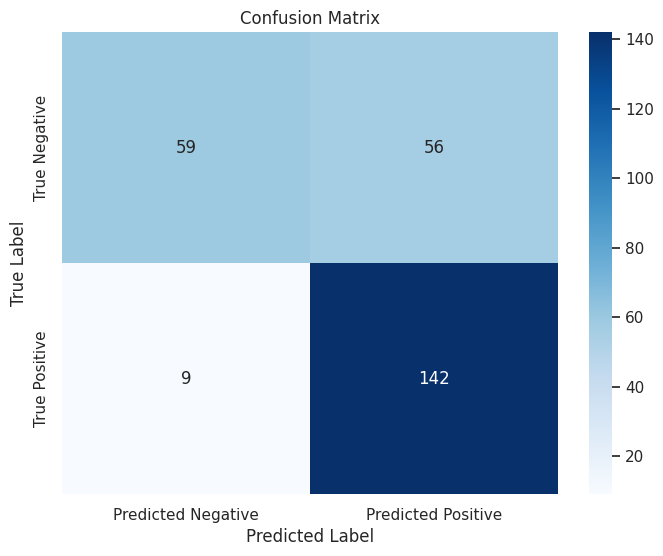

F1:  0.8137535816618912


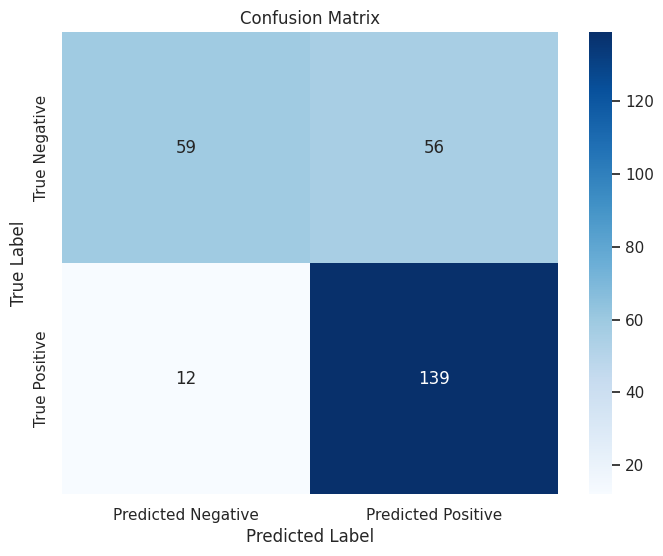

F1:  0.8034682080924855


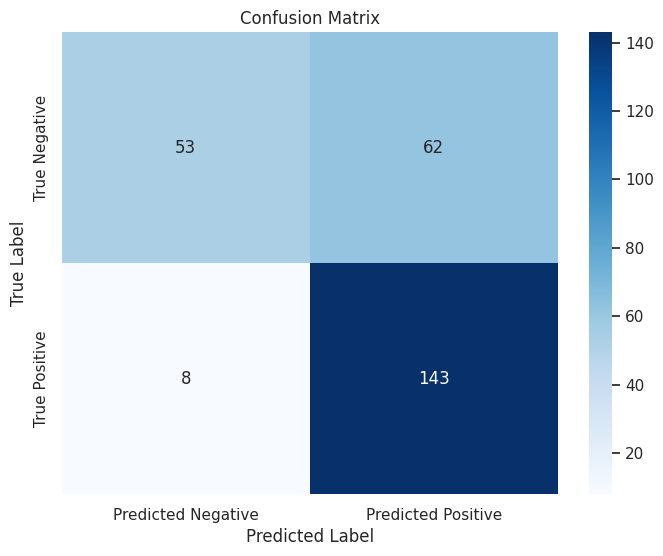

F1:  0.8033707865168539
0.7927928456526587


In [12]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predictions = []
scores = []
i=0

params = {'learning_rate': 0.01097230441498504, 'subsample': 0.9817344831573168, 'colsample_bytree': 0.7258965854774789, 'max_depth': 11, 'scale_pos_weight': 2, 'n_estimators': 427}


fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2 = XGBClassifier(**params)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    score = f1_score(Y_test,preds)
    
    
    

    # Assuming Y_test and preds are your actual and predicted target values, respectively

    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, preds)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')

    # Adding labels and title
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()


    
    
    
    
    
    
    scores.append(score)
    print("F1: ", score) 
    predictions.append(classifier2.predict(test[X.columns]))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

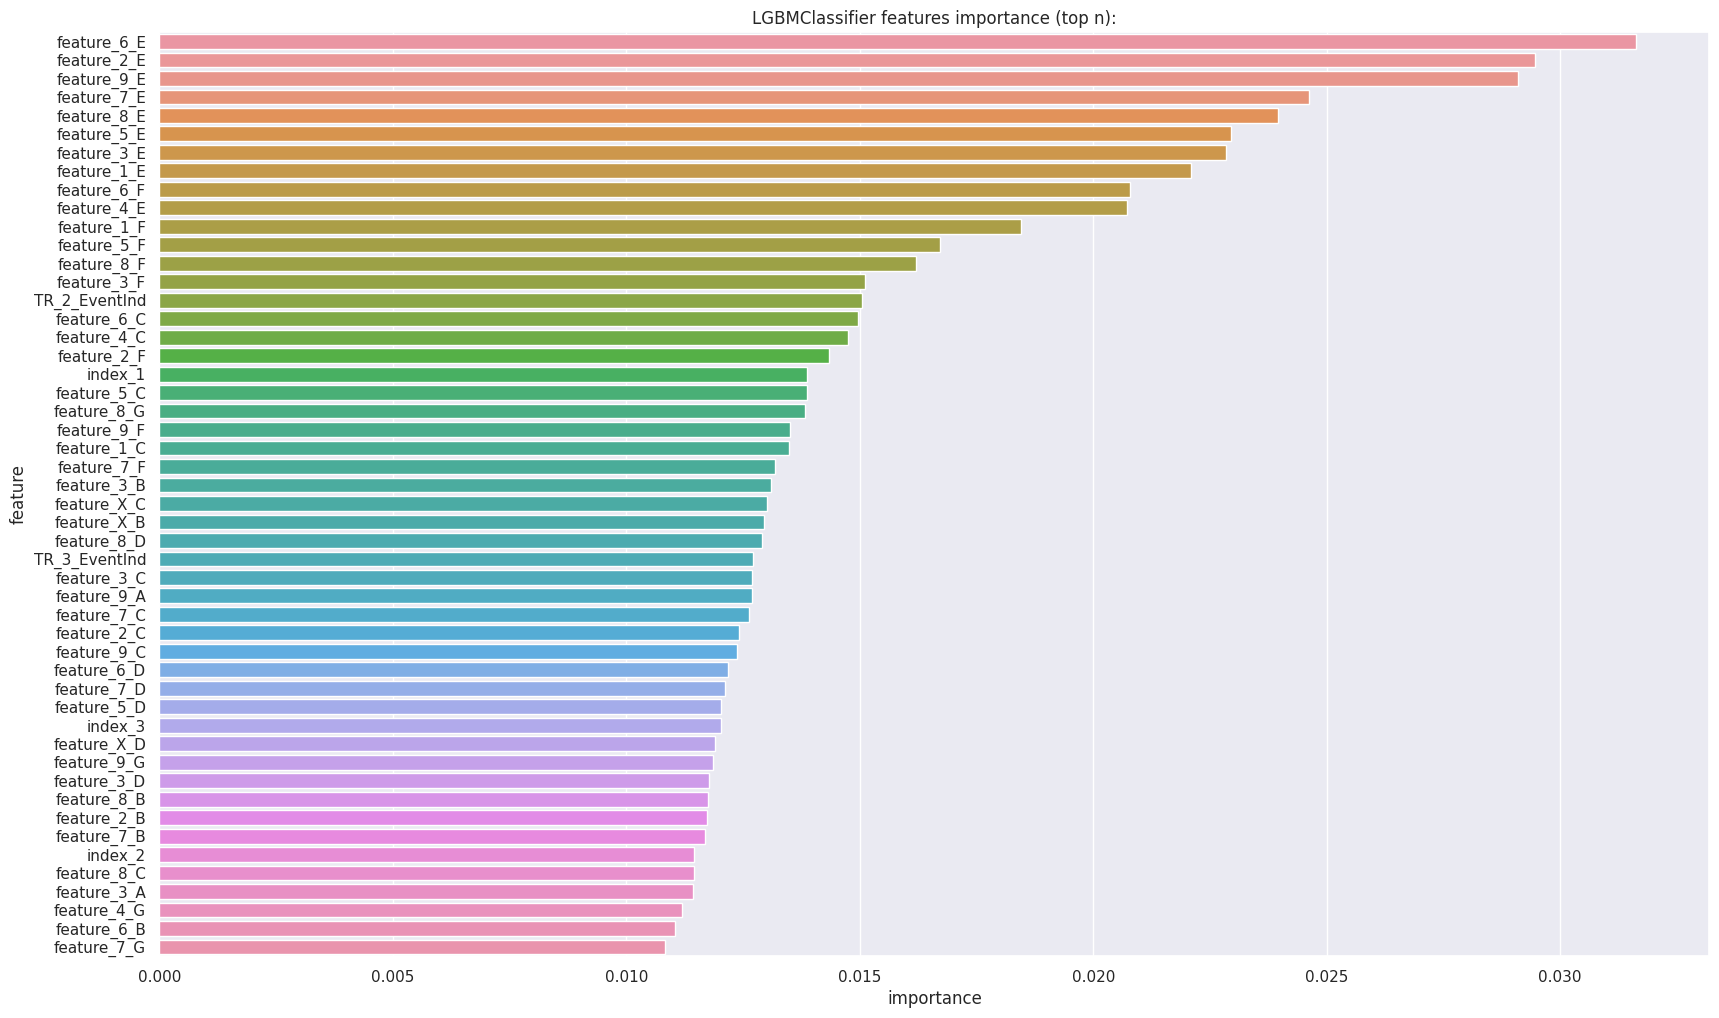

In [13]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [14]:
sub = ss.copy()
sub.head()

,ID,Target
0,2661,1
1,2662,1
2,2663,1
3,2664,1
4,2665,1


In [15]:
predictions_ = pd.DataFrame(predictions)
predictions_.T.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [16]:
predictions = predictions_.mode()
predictions = predictions.T
predictions

,0,1
0,1.0,NaN
1,1.0,NaN
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN
...,...,...
661,1.0,NaN
662,1.0,NaN
663,1.0,NaN
664,1.0,NaN


In [17]:
predictions[0].value_counts()

0
1.0    534
0.0    132
Name: count, dtype: int64

In [18]:
train.Target.value_counts()

Target
1    1510
0    1150
Name: count, dtype: int64

In [19]:
sub["Target"] = predictions[0]
#sub["ID"] = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/UHA23/Test.csv").ID
sub.head()

,ID,Target
0,2661,1.0
1,2662,1.0
2,2663,1.0
3,2664,1.0
4,2665,1.0


In [20]:
name = "XGB Baseline pos 2.csv"
sub.to_csv(name, index=False)